In [1]:
# 기본 도구 가져오기
import pickle
from konlpy.tag import Okt
okt = Okt()

def okt_tokenizer(text):
  tokens = okt.morphs(text)
  return tokens

In [2]:
#학습된 모델 가져오기, tfidf, 영화평점, 약 학습,평가요 총
# 약 20만개 데이터를 기준으로 학습된 모델 불러오기.
tfidf_model_save_path = "./tfidf_model.pkl"
with open(tfidf_model_save_path, "rb") as file:
    tfidf = pickle.load(file)

print("✅ TF-IDF 모델 불러오기 완료")

✅ TF-IDF 모델 불러오기 완료


In [3]:

model_save_path = "./SA_lr_best.pkl"
with open(model_save_path, "rb") as file:
    SA_lr_best = pickle.load(file)

print("✅ 모델 불러오기 완료")


✅ 모델 불러오기 완료


In [4]:
# 학습된 모델을 평가 했더니, 정확도 약 85% 정도 일치
# 긍정, 부정을 분석 일치 여부.
# 임의로, 특정의 문장을 , 이 모델에 입력시키면, 그 결과가, 긍정?, 부정? 판단을 해줌.
# 정확도 약85% 이지만, 생각보다 성능이 많이 떨어짐. 참고하고
st = input("감성 분석하기위한 문장을 입력 해주세요: ")


In [5]:
import re

st = re.compile(r"[ㄱ - | 가-힣]+").findall(st)
print(st)
st = [" ".join(st)]
print(st)


[]
['']


In [6]:
# 해당 문장을 분석하기 좋게 벡터화 과정.
st_tfidf = tfidf.transform(st)

In [7]:
# 만들어둔 모델을 이용해서, 예측값 구하기(평가)
st_predict = SA_lr_best.predict(st_tfidf)

In [8]:
# 긍정 인지, 부정인지 판별하기.
if(st_predict == 0):
  print(st," -> 부정")
else:
  print(st," -> 긍정")

['']  -> 부정


In [12]:
# 코로나 뉴스 json -> 메모리에 불러오기.
import json
file_name = '트럼프_naver_news'
with open("./"+file_name+'.json',encoding='utf-8') as j_f:
  data = json.load(j_f)
print(data)

[{'cnt': 1, 'description': '<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ', 'pDate': '2020-06-04 14:12:00', 'title': "결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;"}, {'cnt': 2, 'description': '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ', 'pDate': '2020-06-04 14:12:00', 'title': '창녕군, ‘창녕형’비대면 선별진료소 운영'}, {'cnt': 3, 'description': "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ", 'pDate': '2020-06-04 14:12:00', 'title': "DK모바일, 메인 홍보 모델로 AOA '설현' 선정"}, {'cnt': 4, 'description': '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ', 'pDate': '2020-06-04 14:12:00', 'title': '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]'}, {'cnt': 5, 

In [13]:
# 해당 기사의 제목, 내용에 대해서,
# 기본적인 전처리 작업.
# 제목, 내용을 담을 임시 리스트 만들기.
data_title = []
data_description = []

for item in data:
  data_title.append(item["title"])
  data_description.append(item["description"])

# data_title
data_description

['<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ',
 '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ',
 "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ",
 '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ',
 '\xa0이재갑\xa0고용노동부\xa0장관은\xa06월3일(수)\xa011시에\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0서울\xa01센터(서울\xa0중구)를\xa0방문했다. 이번\xa0현장\xa0방문은\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0신청을\xa0시작한\xa0지\xa0이틀\xa0만에\xa0약\xa012만건... ',
 "하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로 오프라인 행사를 진행하지 않게 되었고, 공식 채널(Canal +)을 통해 ‘Cannes Official Selection 2020’ 명칭의 초청작 리스트를 공개했다. 한편 '반도'는 7월 국내외... ",
 '경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔고 지난 홍콩 국가보안법

In [14]:
# 리스트 -> 데이터 프레임 (표) 형태로 변환
import pandas as pd
data_df = pd.DataFrame({"title":data_title, "description" : data_description})
data_df.head()

title  \
0  결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;   
1                         창녕군, ‘창녕형’비대면 선별진료소 운영   
2                   DK모바일, 메인 홍보 모델로 AOA '설현' 선정   
3   김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]   
4                        이재갑 장관, 고용안정지원금 서울센터 방문   

                                         description  
0  <b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...  
1  ▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...  
2  한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...  
3  변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...  
4   이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...

In [15]:
# 전처리, 1)제목 2)내용 한글만 남기기 작업.
# re (regex 정규식) 이용해서, 한글만 남기기.
import re
# 제목에서 한글만 추출
data_df["title"]= data_df["title"].apply(lambda x: re.sub(r'[^ ㄱ - | 가-힣]+'," ",x))
# 내용에서 한글만 추출
data_df["description"]= data_df["description"].apply(lambda x: re.sub(r'[^ ㄱ - | 가-힣]+'," ",x))
data_df.head()


title  \
0   결국  증세론  먼저 꺼내든  증세없는  기본소득  불가능    
1              창녕군   창녕형 비대면 선별진료소 운영   
2            모바일  메인 홍보 모델로    설현  선정   
3  김병민  기본소득도 필요하면 논의 테이블에 올려야   인터뷰    
4             이재갑 장관  고용안정지원금 서울센터 방문   

                                         description  
0   코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만  국세 수입은 줄어들면서...  
1    지난  일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...  
2  한편   설현 은 최근  코로나  바이러스를 다룬     시리즈   세계적 유행 에...  
3  변화의 핵심 중에서는 우리 사회가 신종  코로나 바이러스 감염증 코로나 의 위기를 ...  
4   이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...

In [16]:
# 벡터화 작업
data_title_tfidf = tfidf.transform(data_df["title"])

In [17]:
data_title_predict = SA_lr_best.predict(data_title_tfidf)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

title_label
0    475
1    325
Name: count, dtype: int64
description_label
0    447
1    353
Name: count, dtype: int64
[['변화', '핵심', '중', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '의', '위기', '마주', '언제', '끝', '날', '또', '앞', '미래', '국가', '국민', '어려움', '해결', '저희'], ['한편', '코로나', '로', '해외', '식', '재료', '사재기', '국민', '먹거리', '안정', '생산', '것', '포스트', '코로나', '의', '과제', '부각', '농민', '기본소득', '도입', '통해', '안정', '생산', '기반', '확충', '것'], ['최근', '갤러리', '현대', '창업', '주년', '기념', '전', '이', '작품', '전시', '코로나', '의', '영향', '마스크', '착용', '관람객', '미술', '트렌드', '한국', '미술', '시장', '글', '정태희', '서울', '옥션', '스페셜리스트', '세계', '경기', '침체', '코로나', '여파'], ['코로나', '감안', '차', '면접', '비대', '역량', '검사', '도입', '국내', '최대', '치킨', '프랜차이즈', '제너시스', '비비큐', '회장', '채용', '관계자', '한국', '대표', '책임감', '브랜드', '로서', '코로나', '로', '침체', '채용', '분위기'], ['일', '오후', '서울', '중랑구', '의료', '의료', '잠시', '콘서트', '신종', '코로나', '바이러스', '감염증', '코로나', '환자', '진료', '위해', '수고', '온', '의료', '진', '가수', '폴', '킴', '공연', '보고', '뉴스'], ['플립', '러닝', '온라인', '학습', '후', '교실', '토론', '및'

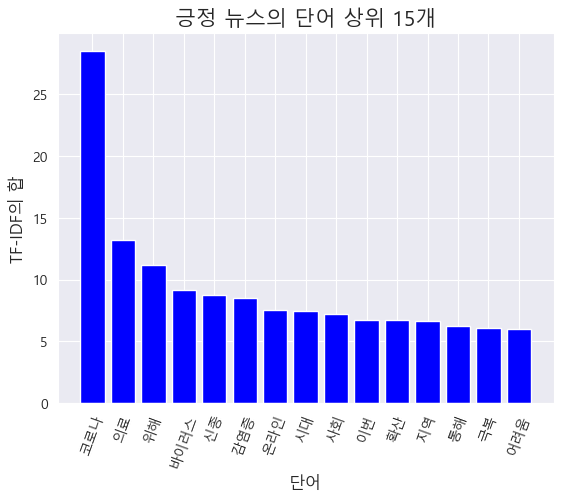

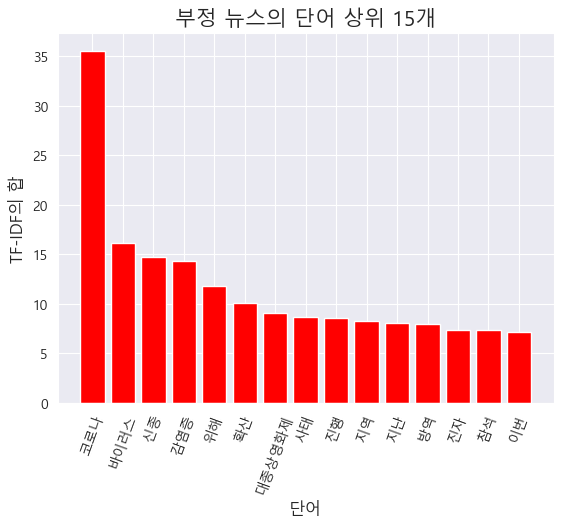

In [19]:
# 예측값을 새로운 컬럼으로 사용하기.
data_df["title_label"] = data_title_predict
# description , 같은 작업 반복
# 벡터화 작업
data_description_tfidf = tfidf.transform(data_df["description"])
# 학습이 된 감성 분석 모델을 이용해서, 해당 제목으로, 긍정, 부정인지 평가하기.
data_description_predict = SA_lr_best.predict(data_description_tfidf)
# 예측값을 새로운 컬럼으로 사용하기.
data_df["description_label"] = data_description_predict
data_df.head()
# 파일 csv 로 옮기기
data_df.to_csv("./" + file_name + ".csv", encoding="utf-8")
# 간단히, 해당 제목, 내용이 , 긍정, 부정의 글의 갯수가 몇개인지 파악해보기.
print(data_df["title_label"].value_counts())
print(data_df["description_label"].value_counts())
# 제목, 내용 분리 작업.
columns_name = ['title', 'title_label', 'description', 'description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows():
    title = data["title"]
    description = data["description"]
    t_label = data["title_label"]
    d_label = data["description_label"]

    if d_label == 0:  # 부정 감성 샘플만 추출
        # NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
        new_data_df = pd.DataFrame([[title, t_label, description, d_label]], columns=columns_name)
        NEG_data_df = pd.concat([NEG_data_df, new_data_df], ignore_index=True)
    else:  # 긍정 감성 샘플만 추출
        # POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
        new_data_df = pd.DataFrame([[title, t_label, description, d_label]], columns=columns_name)
        POS_data_df = pd.concat([POS_data_df, new_data_df], ignore_index=True)
# 파일에 저장.
NEG_data_df.to_csv('./' + file_name + '_NES.csv', encoding='utf-8')
POS_data_df.to_csv('./' + file_name + '_POS.csv', encoding='utf-8')
len(NEG_data_df), len(POS_data_df)
POS_description = POS_data_df['description']
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d))  #형태소가 명사인 것만 추출
print(POS_description_noun_tk)  #작업 확인용 출력
POS_description_noun_join = []

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    POS_description_noun_join.append(" ".join(d2))  # 토큰을 연결(join)하여 리스트 구성
print(POS_description_noun_join)  #작업 확인용 출력
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d))  #형태소가 명사인 것만 추출

for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2))  # 토큰을 연결(join)하여 리스트 구성
print(NEG_description_noun_join)  #작업 확인용 출력
POS_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)
POS_vocab = dict()

for idx, word in enumerate(POS_tfidf.get_feature_names_out()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)
POS_words  #작업 확인용 출력
NEG_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)
NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names_out()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)
NEG_words  #작업 확인용 출력
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm._get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

max = 15  #바 차트에 나타낼 단어의 수
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 뉴스의 단어 상위 %d개" % max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 뉴스의 단어 상위 %d개" % max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()

In [20]:
import gensim
import gensim.corpora as corpora

description = data_df['description']
description_noun_tk = []

for d in description:
    description_noun_tk.append(okt.nouns(d))  #형태소가 명사인 것만 추출

description_noun_tk2 = []

for d in description_noun_tk:
    item = [i for i in d if len(i) > 1]  #토큰의 길이가 1보다 큰 것만 추출
    description_noun_tk2.append(item)
dictionary = corpora.Dictionary(description_noun_tk2)
print(dictionary[1])  #작업 확인용 출력
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]
print(corpus)  #작업 확인용 출력
# ✔️ LDA는 문서에서 숨겨진 토픽을 찾아내는 알고리즘
# ✔️ 토픽을 정의할 필요 없이, 문서에서 자동으로 토픽을 추출
# ✔️ 토픽마다 특정 단어들이 높은 확률로 등장
# ✔️ 각 문서가 어떤 토픽에 속하는지 분석 가능
k = 4  #토픽의 개수 설정
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations=12, num_topics=k, id2word=dictionary, passes=1,
                                                    workers=10)
# corpus: 문서를 토큰화하여 BOW(Bag-of-Words) 형식으로 변환한 데이터
# iterations=12: 각 문서에서 토픽을 업데이트하는 반복 횟수
# num_topics=k: 찾을 토픽 개수 (여기서는 4개)
# id2word=dictionary: 단어 ID와 단어 매핑 정보
# passes=1: 전체 데이터셋을 몇 번 학습할지 (값이 클수록 학습이 더 많이 됨)
# workers=10: 병렬처리를 위한 CPU 코어 개수

print(lda_model.print_topics(num_topics=k, num_words=15))
#최초 한번만 설치
# !pip install pyLDAvis
# !pip install --upgrade pandas
import pickle

with open("lda_model.pkl", "wb") as f:
    pickle.dump(lda_model, f)

import pyLDAvis.gensim

lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
# lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, n_jobs=1)

경제
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1)], [(17, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 3), (33, 3), (34, 1), (35, 1), (36, 1)], [(5, 1), (17, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(12, 1), (17, 2), (43, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(17, 2), (68, 2), (69, 1), (70, 2), (71, 2), (72, 2), (73, 1), (74, 1), (75, 1), (76, 2), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1)], [(17, 2), (43, 1), (52, 1), (54, 1), (61, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1)], [(11,

In [21]:
pyLDAvis.display(lda_vis)
